## Dataset Location : 'c:\\Users\\new\\OneDrive\\Desktop\\Zomato project\\Notebooks\\Data'

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection import train_test_split
import seaborn as sns
import lightgbm as lgb

In [3]:
df=pd.read_csv('Data/Semi_Cleaned_data.csv')

In [4]:
df.drop([df.columns[0]],axis=1,inplace=True)

In [5]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance in kms,Order_Day,Order_month,Order_year,Time_Orderd_Hour,Time_Orderd_mins,Time_Order_picked_Hour,Time_Order_picked_mins
0,DEHRES17DEL01,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.3,12,2,2022,21.0,55.0,22.0,10.0
1,KOCRES16DEL01,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.2,13,2,2022,14.0,55.0,15.0,5.0
2,PUNERES13DEL03,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.8,4,3,2022,17.0,30.0,17.0,40.0
3,LUDHRES15DEL02,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.9,13,2,2022,9.0,20.0,9.0,30.0
4,KNPRES14DEL02,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.4,14,2,2022,19.0,50.0,20.0,5.0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Time_taken (min)'],axis=1),df[['Time_taken (min)']],test_size=0.3,random_state=45)

# Custom transformers 

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)
    
class CustomTransformer2(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)

class CustomTransformer3(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)


In [8]:
def frequency_encoding(X):
    temp=X['Delivery_person_ID'].value_counts().reset_index()
    h={}
    h=dict(h)
    for i in range(len(temp['Delivery_person_ID'])):
        h[str(temp['Delivery_person_ID'][i])]=temp['count'][i]
    X['Delivery_person_ID']=X['Delivery_person_ID'].replace(h)
    return X


def road_traffic_density(X):
    X = X.copy()
    
    # Define the mapping for road_traffic_density
    density_mapping = {
        'Low': 0,
        'Medium': 1,
        'High': 2,
        'Jam': 3
    }
    
    # Apply the mapping
    X['Road_traffic_density'] = X['Road_traffic_density'].map(density_mapping).astype(float)
    return X


def Type_of_vehicle(X):
    X = X.copy()
    
    # Define the mapping for road_traffic_density
    density_mapping = {
       'bicycle':0,
       'scooter':1,
       'motorcycle':2,
       'electric_scooter':3
    }
    
    # Apply the mapping
    X['Type_of_vehicle'] = X['Type_of_vehicle'].map(density_mapping).astype(float)
    return X


In [9]:
Encoding_tnf=ColumnTransformer(transformers=[
    ("tnf2",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),['Weather_conditions','Type_of_order','Festival','City'])
    ],remainder="passthrough")


scaling_tnf=ColumnTransformer(transformers=[
    ("tnf",StandardScaler(),slice(0,18))
],remainder="passthrough")

In [10]:
model=lgb.LGBMRegressor(colsample_bytree=0.9769037375988533,learning_rate=0.05854272296061775,max_depth=18,min_child_weight=0.7607736996559302,n_estimators=100,num_leaves=130,subsample=0.5434350673119992)

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('custom', CustomTransformer(frequency_encoding)),
    ('custom2', CustomTransformer2(road_traffic_density)),
    ('custom3', CustomTransformer3(Type_of_vehicle)),
    ('Encoding_tnf',Encoding_tnf),
    ('scaling_tnf',scaling_tnf),
    ('model',model)

    
])


In [12]:
pipeline

Pipeline(steps=[('custom',
                 CustomTransformer(func=<function frequency_encoding at 0x00000222E14BECA0>)),
                ('custom2',
                 CustomTransformer2(func=<function road_traffic_density at 0x00000222E14BEE50>)),
                ('custom3',
                 CustomTransformer3(func=<function Type_of_vehicle at 0x00000222E14BEEE0>)),
                ('Encoding_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2'...
                                                  ['Weather_conditions',
                                                   'Type_of_order', 'Festival',
                                                   'City'])])),
                ('scaling_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf', StandardScaler(),
                                                  slice(0, 18, None))])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.9769037375988533,
                               learning_rate=0.05854272296061775, max_depth=18,
                               min_child_weight=0.7607736996559302,
                               num_leaves=130, subsample=0.5434350673119992))])

In [13]:
pipeline.fit(X_train,y_train)

c:\Users\new\anaconda3\envs\EDA_practice\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 31908, number of used features: 28
[LightGBM] [Info] Start training from score 26.277924


Pipeline(steps=[('custom',
                 CustomTransformer(func=<function frequency_encoding at 0x00000222E14BECA0>)),
                ('custom2',
                 CustomTransformer2(func=<function road_traffic_density at 0x00000222E14BEE50>)),
                ('custom3',
                 CustomTransformer3(func=<function Type_of_vehicle at 0x00000222E14BEEE0>)),
                ('Encoding_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2'...
                                                  ['Weather_conditions',
                                                   'Type_of_order', 'Festival',
                                                   'City'])])),
                ('scaling_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf', StandardScaler(),
                                                  slice(0, 18, None))])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.9769037375988533,
                               learning_rate=0.05854272296061775, max_depth=18,
                               min_child_weight=0.7607736996559302,
                               num_leaves=130, subsample=0.5434350673119992))])

In [13]:
y_pred_train=pipeline.predict(X_train)

In [14]:
y_pred_test=pipeline.predict(X_test)

In [24]:
X_train.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Distance in kms', 'Order_Day', 'Order_month', 'Order_year',
       'Time_Orderd_Hour', 'Time_Orderd_mins', 'Time_Order_picked_Hour',
       'Time_Order_picked_mins'],
      dtype='object')

In [26]:

# Specified columns
columns = ['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
           'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
           'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
           'City', 'Distance in kms', 'Order_Day', 'Order_month', 'Order_year',
           'Time_Orderd_Hour', 'Time_Orderd_mins', 'Time_Order_picked_Hour',
           'Time_Order_picked_mins']

# Provided data
data = ["DEHRES17DEL01", 36.0, 4.2, "Fog", "Jam", 2, "Snack", "motorcycle", 3.0, "No", 
        "Metropolitian", 10.3, 12, 2, 2022, 21.0, 55.0, 22.0, 10.0]

# Creating the DataFrame
test = pd.DataFrame([data], columns=columns)
test


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance in kms,Order_Day,Order_month,Order_year,Time_Orderd_Hour,Time_Orderd_mins,Time_Order_picked_Hour,Time_Order_picked_mins
0,DEHRES17DEL01,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,10.3,12,2,2022,21.0,55.0,22.0,10.0


In [27]:
pipeline.predict(test)

array([46.85292496])

## Performance metrics

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_train,y_pred_train)#training dataset

0.8646819704397941

In [17]:
r2_score(y_test,y_pred_test)#test dataset

0.8287061475261381

In [19]:
df.shape[1]

20

In [18]:
#Training dataset values
# Given values
r2score = r2_score(y_train,y_pred_train)
n = df.shape[0]
p = df.shape[1]

# Calculate adjusted R^2
adjusted_r2_score = 1 - ((1 - r2score) * (n - 1) / (n - p - 1))

# Print the result
print(f"Adjusted R^2 score: {adjusted_r2_score}")


Adjusted R^2 score: 0.864622572230914


In [19]:
#Testing dataset values
# Given values
r2score = r2_score(y_test,y_pred_test)
n = df.shape[0]
p = df.shape[1]

# Calculate adjusted R^2
adjusted_r2_score = 1 - ((1 - r2score) * (n - 1) / (n - p - 1))

# Print the result
print(f"Adjusted R^2 score: {adjusted_r2_score}")


Adjusted R^2 score: 0.828630957634132


In [22]:
adjusted_r2_score

0.828630957634132

## Errors

In [19]:
#Training dataset

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
print(f"MSE : {mean_squared_error(y_train,y_pred_train)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train,y_pred_train))}")
print(f"MAE : {mean_absolute_error(y_train,y_pred_train)}")
print(f"MAP : {mean_absolute_percentage_error(y_train,y_pred_train)}")

MSE : 11.897797332161808
RMSE : 3.449318386603621
MAE : 2.787986794601539
MAP : 0.12167247469759274


In [20]:
#Testing dataset

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
print(f"MSE : {mean_squared_error(y_test,y_pred_test)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_test))}")
print(f"MAE : {mean_absolute_error(y_test,y_pred_test)}")
print(f"MAP : {mean_absolute_percentage_error(y_test,y_pred_test)}")

MSE : 15.139643199604283
RMSE : 3.8909694421319068
MAE : 3.1040412018774894
MAP : 0.13505572837356664


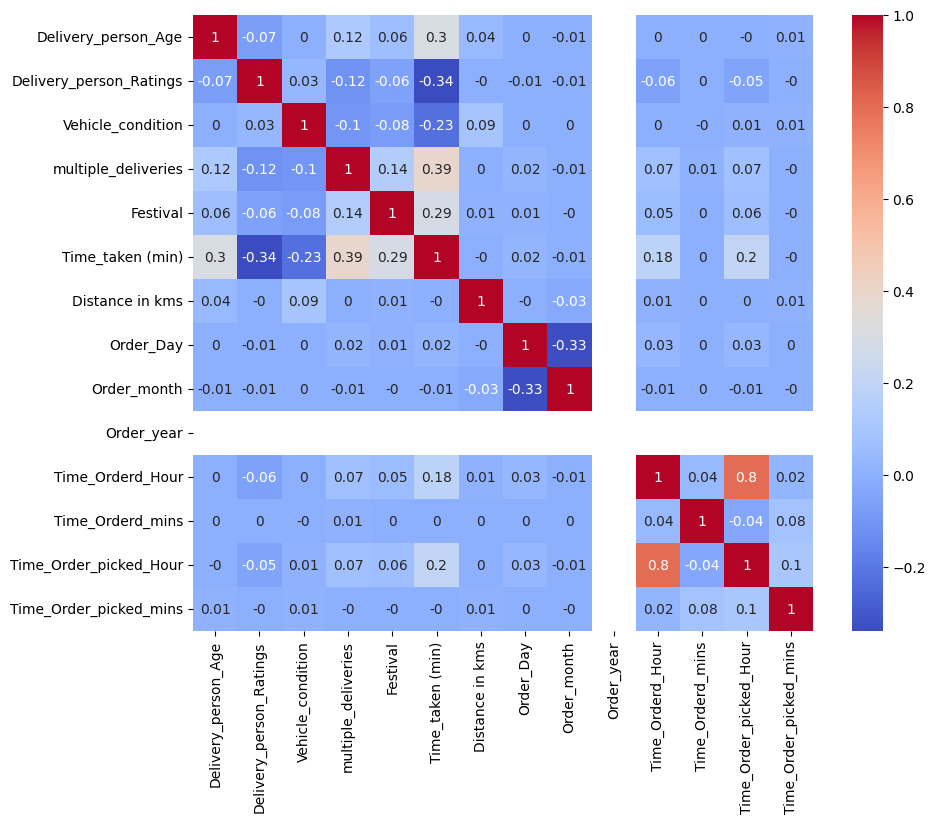

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
corr = np.round(df1.select_dtypes(exclude='object').corr(), 2)

# Create a figure with specific size
plt.figure(figsize=(10, 8))  # Adjust width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [97]:
np.round(df.select_dtypes(exclude='object').cov(),2)

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Distance in kms,Order_Day,Order_month,Order_year,Time_Orderd_Hour,Time_Orderd_mins,Time_Order_picked_Hour,Time_Order_picked_mins
Delivery_person_Age,33.81,-0.13,0.02,0.39,16.32,127.50,0.16,-0.02,0.0,0.03,0.06,-0.02,0.84
Delivery_person_Ratings,-0.13,0.11,0.01,-0.02,-1.06,-0.27,-0.02,-0.00,0.0,-0.10,0.02,-0.09,-0.01
Vehicle_condition,0.02,0.01,0.70,-0.05,-1.85,85.24,0.01,0.00,0.0,0.01,-0.04,0.04,0.09
multiple_deliveries,0.39,-0.02,-0.05,0.33,2.08,0.59,0.08,-0.00,0.0,0.19,0.05,0.22,-0.05
Time_taken (min),16.32,-1.06,-1.85,2.08,88.07,-25.83,1.96,-0.06,0.0,8.10,0.66,9.68,-0.56
Distance in kms,127.50,-0.27,85.24,0.59,-25.83,1209645.36,-5.94,-20.53,0.0,18.55,14.05,19.80,122.05
Order_Day,0.16,-0.02,0.01,0.08,1.96,-5.94,75.84,-1.55,0.0,1.38,0.61,1.44,0.18
Order_month,-0.02,-0.00,0.00,-0.00,-0.06,-20.53,-1.55,0.30,0.0,-0.02,0.01,-0.02,-0.02
Order_year,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
Time_Orderd_Hour,0.03,-0.10,0.01,0.19,8.10,18.55,1.38,-0.02,0.0,22.36,2.63,19.86,1.84


In [24]:
pipeline

Pipeline(steps=[('custom',
                 CustomTransformer(func=<function frequency_encoding at 0x000001E6FE7309D0>)),
                ('custom2',
                 CustomTransformer2(func=<function road_traffic_density at 0x000001E6CFCFA940>)),
                ('custom3',
                 CustomTransformer3(func=<function Type_of_vehicle at 0x000001E6CFCFA9D0>)),
                ('Encoding_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2'...
                                                  ['Weather_conditions',
                                                   'Type_of_order', 'Festival',
                                                   'City'])])),
                ('scaling_tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf', StandardScaler(),
                                                  slice(0, 18, None))])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.9769037375988533,
                               learning_rate=0.05854272296061775, max_depth=18,
                               min_child_weight=0.7607736996559302,
                               num_leaves=130, subsample=0.5434350673119992))])

In [33]:
pipeline.steps

[('custom',
  CustomTransformer(func=<function frequency_encoding at 0x000001B28FE00160>)),
 ('custom2',
  CustomTransformer2(func=<function road_traffic_density at 0x000001B28FE6E310>)),
 ('custom3',
  CustomTransformer3(func=<function Type_of_vehicle at 0x000001B28FE6E3A0>)),
 ('Encoding_tnf',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('tnf2',
                                   OneHotEncoder(drop='first',
                                                 sparse_output=False),
                                   ['Weather_conditions', 'Type_of_order',
                                    'Festival', 'City'])])),
 ('scaling_tnf',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('tnf', StandardScaler(), slice(0, 18, None))])),
 ('model',
  LGBMRegressor(colsample_bytree=0.9769037375988533,
                learning_rate=0.05854272296061775, max_depth=18,
                min_child_weight=0.7607736996559302, num_leaves=130,
 

In [23]:
pip install dill

  Obtaining dependency information for dill from https://files.pythonhosted.org/packages/c9/7a/cef76fd8438a42f96db64ddaa85280485a9c395e7df3db8158cfec1eee34/dill-0.3.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/116.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 116.3/116.3 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import dill

with open('transformer.pkl', 'wb') as f:
    dill.dump(pipeline, f)
